<a href="https://colab.research.google.com/github/vishal2892002/Application-2-zeotap-assignment-2/blob/main/DS_Zeotap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import io
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 1: Upload the dataset in Google Colab
from google.colab import files # Import the 'files' module from google.colab

print("Please upload the CSV file containing the dataset.")
uploaded = files.upload()

Please upload the CSV file containing the dataset.


Saving Customers.csv to Customers (1).csv


In [5]:
# Step 1: Upload the dataset in Google Colab
from google.colab import files # Import the 'files' module from google.colab

print("Please upload the CSV file containing the dataset.")
uploaded = files.upload()

Please upload the CSV file containing the dataset.


Saving Products.csv to Products (1).csv


In [6]:
# Step 1: Upload the dataset in Google Colab
from google.colab import files # Import the 'files' module from google.colab

print("Please upload the CSV file containing the dataset.")
uploaded = files.upload()

Please upload the CSV file containing the dataset.


Saving Transactions.csv to Transactions.csv


In [11]:
import pandas as pd

df = pd.read_csv("Customers.csv", sep=",", on_bad_lines='skip')  # or on_bad_lines='warn'
df = pd.read_csv("Products.csv", sep=",", on_bad_lines='skip')  # or on_bad_lines='warn'
df = pd.read_csv("Transactions.csv", sep=",", on_bad_lines='skip')  # or on_bad_lines='warn'

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [13]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [15]:
 #**Data Inspection**: Check for missing values, data types, and basic statistics.


In [26]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [42]:
# Check for missing values
df = pd.read_csv("Customers.csv", sep=",", on_bad_lines='skip')
# Assuming 'CustomerID' is the customer identifier column
customer_nulls = df['CustomerID'].isnull().sum()  # Access the 'CustomerID' column and check for nulls
print(f"Missing values in CustomerID column: {customer_nulls}")

df = pd.read_csv("Products.csv", sep=",", on_bad_lines='skip')
product_nulls = df.isnull().sum()  # Check for nulls in the entire DataFrame
print(f"Missing values in Products DataFrame:\n{product_nulls}")

df = pd.read_csv("Transactions.csv", sep=",", on_bad_lines='skip')
transaction_nulls = df.isnull().sum() #Check for nulls in the entire DataFrame
print(f"Missing values in Transactions DataFrame:\n{transaction_nulls}")

Missing values in CustomerID column: 0
Missing values in Products DataFrame:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions DataFrame:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [43]:
df.drop_duplicates(inplace=True)

In [45]:
 # Import necessary libraries
import pandas as pd

# ... (rest of your imports)

# Load the Transactions data into the 'transactions' DataFrame
transactions = pd.read_csv("Transactions.csv", sep=",", on_bad_lines='skip')

# ... (rest of your code)

# Now you can use the 'transactions' DataFrame
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [46]:
#. **Data Cleaning**:

In [48]:
Customers = pd.read_csv("Customers.csv", sep=",", on_bad_lines='skip')
Transactions = pd.read_csv("Transactions.csv", sep=",", on_bad_lines='skip')

In [53]:
# Fill missing data (if any)
Customers.fillna('Unknown', inplace=True)

# Read the 'Products.csv' file into a DataFrame called 'Products'
Products = pd.read_csv("Products.csv", sep=",", on_bad_lines='skip')

# Select only numeric columns for filling missing values
import numpy as np
numeric_columns = Products.select_dtypes(include=np.number).columns
Products[numeric_columns] = Products[numeric_columns].fillna(Products[numeric_columns].mean())

In [54]:
#**Visualizations**:
  # - Create visualizations like histograms, box plots, and bar charts to understand the data distribution.

<Axes: xlabel='Price', ylabel='Count'>

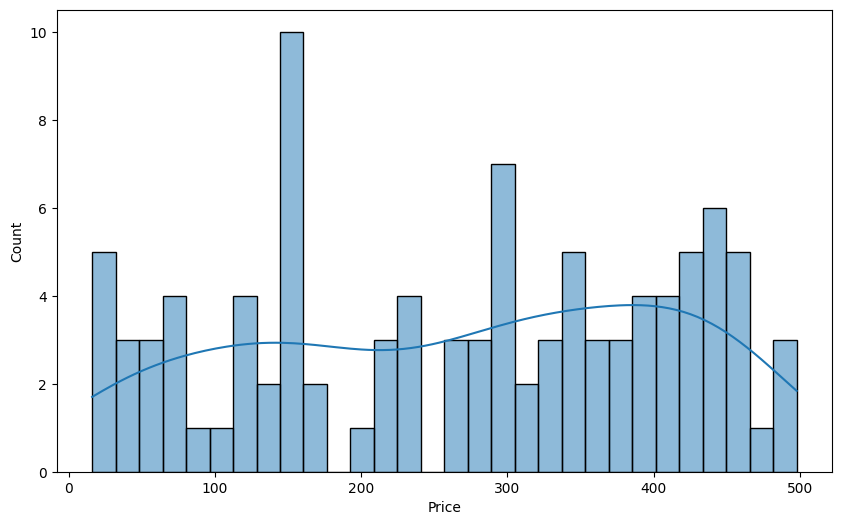

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of product prices
plt.figure(figsize=(10, 6)) # Removed extra indentation
sns.histplot(Products['Price'], bins=30, kde=True) # Changed 'products' to 'Products'


In [65]:
# Region-wise distribution of customers

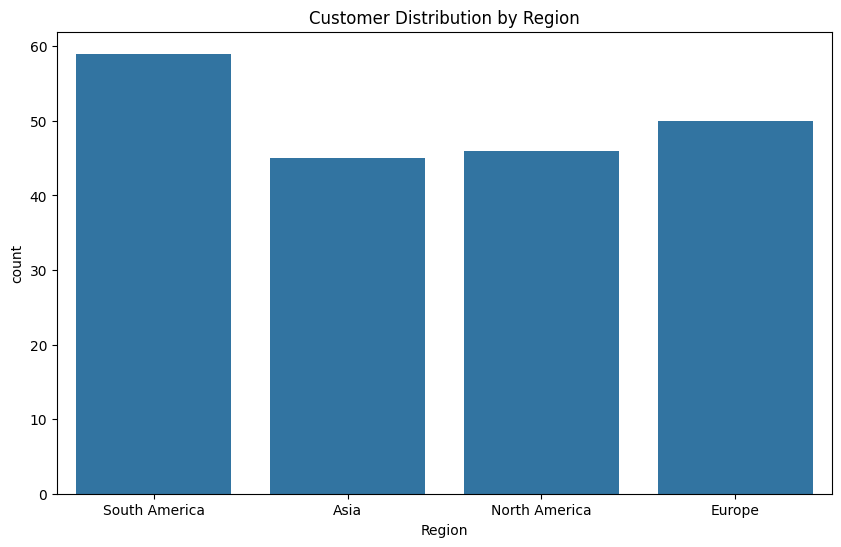

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Region-wise distribution of customers
plt.figure(figsize=(10, 6))
sns.countplot(data=Customers, x='Region') # Changed 'customers' to 'Customers'
plt.title('Customer Distribution by Region')
plt.show()

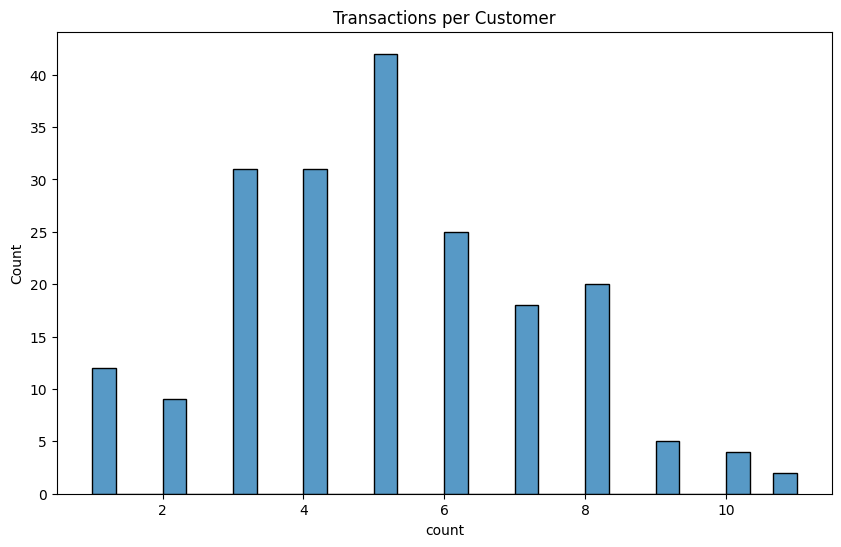

In [68]:
# Number of transactions per customer
transaction_counts = transactions['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(transaction_counts, bins=30)
plt.title('Transactions per Customer')
plt.show()

In [69]:
#: Lookalike Model

In [70]:
# Feature Engineering
#. **Customer Profile Features**:
   # - Merge the `Customers` and `Transactions` datasets on `CustomerID` to get transaction history for each customer.
    #- Extract features like total spending, number of transactions, and average transaction value.

In [78]:
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

# Merge with customer profile
customer_data = pd.merge(Customers, customer_transactions, on='CustomerID') # Fixed indentation and replaced 'customers' with 'Customers'

In [79]:
#**Product Profile Features**:
   # - Group the `Transactions` dataset by `ProductID` to capture product-specific features like total sales and average price.
    #- Merge these features into the `Transactions` data.

In [81]:
product_data = transactions.groupby('ProductID').agg(
    total_sales=('TotalValue', 'sum'),
    avg_price=('Price', 'mean')
).reset_index()

# Merge with transactions
transactions = pd.merge(transactions, product_data, on='ProductID') #Removed extra indentation

In [83]:
#Similarity Calculation
#**Calculate similarity score**:

In [84]:
    from sklearn.metrics.pairwise import cosine_similarity

In [85]:
    features = customer_data[['total_spent', 'total_transactions', 'avg_transaction_value']]

In [86]:
  similarity_matrix = cosine_similarity(features)

In [90]:

    # For each customer, find top 3 similar customers
    similar_customers = {}
    for idx, customer in enumerate(customer_data['CustomerID']):
        similarity_scores = similarity_matrix[idx]
        similar_indices = similarity_scores.argsort()[-4:-1]  # top 3 similar customers
        similar_customers[customer] = [(customer_data.iloc[i]['CustomerID'], similarity_scores[i]) for i in similar_indices]

In [91]:

    # Convert to DataFrame for output
    lookalike_df = pd.DataFrame(similar_customers.items(), columns=['CustomerID', 'SimilarCustomers'])

In [92]:
#Customer Segmentation / Clustering

In [ ]:
#Preprocessing for Clustering
# **Feature Engineering**:

In [93]:
    customer_features = customer_data[['total_spent', 'total_transactions', 'avg_transaction_value']]

In [94]:
#Apply Clustering Algorithm
#You can use K-Means clustering or DBSCAN for customer segmentation.

#**K-Means Clustering**:

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score # Removed extra space at the beginning of the line

In [101]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_features)
# Evaluate with DB Index
db_index = davies_bouldin_score(customer_features, customer_data['Cluster']) # Removed extra spaces before this line
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.6375161720046073


In [103]:
#Visualization of Clusters
#. **Visualization**: Use PCA or t-SNE for dimensionality reduction and visualize the clusters.

from sklearn.decomposition import PCA # Removed extra indentation
pca = PCA(n_components=2) # Removed extra indentation
pca_result = pca.fit_transform(customer_features)

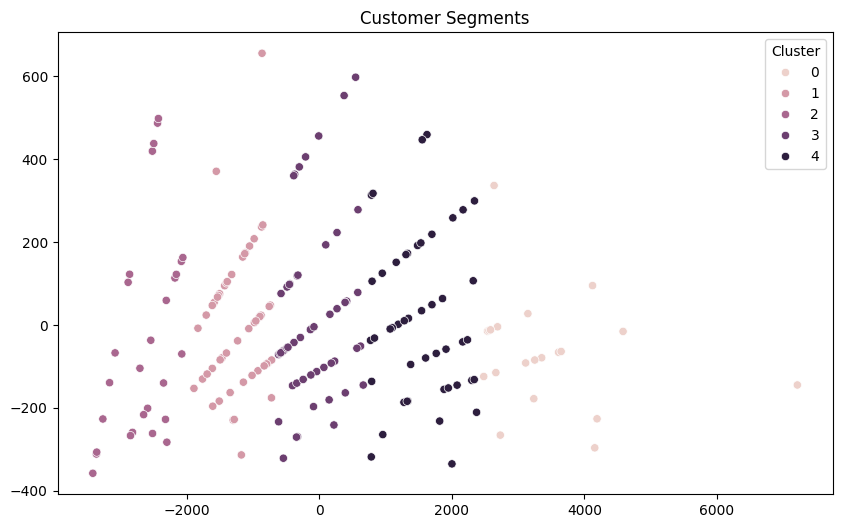

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=customer_data['Cluster'])
plt.title('Customer Segments')
plt.show()